# **HR data Analysis for attrition:**<br>

**Problem Statement:**<br>
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**Attrition in HR**<br>
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**<br>
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [2]:
hr_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr_data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
353,37,No,Travel_Rarely,1319,Research & Development,6,3,Medical,1,474,...,1,80,2,13,2,3,7,7,6,7
742,50,No,Travel_Rarely,804,Research & Development,9,3,Life Sciences,1,1030,...,2,80,0,8,5,3,1,0,0,0
1247,31,No,Travel_Rarely,1003,Sales,5,3,Technical Degree,1,1749,...,3,80,1,6,3,3,5,2,0,2
1115,34,No,Travel_Rarely,479,Research & Development,7,4,Medical,1,1577,...,3,80,0,1,4,1,1,0,0,0
393,34,No,Non-Travel,1381,Sales,4,4,Marketing,1,523,...,1,80,1,6,3,3,3,2,1,2
947,52,Yes,Travel_Rarely,1030,Sales,5,3,Life Sciences,1,1319,...,3,80,0,10,2,2,8,7,7,7
904,48,No,Travel_Rarely,715,Research & Development,1,3,Life Sciences,1,1263,...,3,80,0,25,3,4,1,0,0,0
1349,26,No,Travel_Rarely,482,Research & Development,1,2,Life Sciences,1,1893,...,3,80,1,1,3,2,1,0,1,0
1184,54,No,Travel_Rarely,584,Research & Development,22,5,Medical,1,1665,...,3,80,1,36,6,3,10,8,4,7
121,33,No,Non-Travel,750,Sales,22,2,Marketing,1,160,...,1,80,1,8,2,4,7,7,0,7


In [3]:
hr_data.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
missing_val = {}
for i in hr_data.columns:
    if hr_data[i].isnull().sum() >0:
        missing_val[i] = hr_data[i].isnull().sum()
print(missing_val)

{}


In [6]:
object_columns =  hr_data.select_dtypes(include ="object")
num_col = hr_data.select_dtypes(exclude ="object")
print("object_columns count",object_columns.shape[1])
print("number columns count",num_col.shape[1])

object_columns count 9
number columns count 26


We have 35 columns in the data with 1470 observations. I have checked missing value as well anf found that there are no missing value.We have 9 obejct columns and 26 numeric cols.

In [7]:
hr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In above stats information, there are mix of features pure numeric in nature and some are categorical feature.
a few columns like Age, Daily rates are almost normally distributed,<><><><< Distance from home is left skewed. Monthly rate is right skewed.

In [8]:
object_columns.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


in target class NO which means no attrition count is high as compared to Yes. we will see that thought visulizationn. it has 3 departments, educationfiled are 9, maximum people are working in R&D department.All are over18, this columns has only one value for everyone and we can delete it. approx 72% people dont do overtime.  

No     1233
Yes     237
Name: Attrition, dtype: int64 



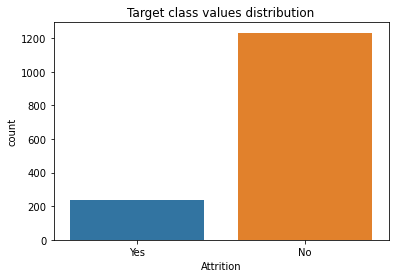

In [105]:
# checking Target colums values
print(hr_data["Attrition"].value_counts(),"\n")
sns.countplot(hr_data["Attrition"])
plt.title("Target class values distribution");

As seen in the describe analysis, it is matter of imbalance data that we will treat it by using up sampling methods<br>
**lets do more analysis**

In [10]:
hr_data.groupby("Attrition")[["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate","PercentSalaryHike","TrainingTimesLastYear","TotalWorkingYears","YearsWithCurrManager"]].mean()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,TrainingTimesLastYear,TotalWorkingYears,YearsWithCurrManager
Attrition,,,,,,,,,,
No,37.561233,812.504461,8.915653,65.952149,6832.739659,14265.779400,15.231144,2.832928,11.862936,4.367397
Yes,33.607595,750.362869,10.632911,65.573840,4787.092827,14559.308017,15.097046,2.624473,8.244726,2.852321


Peole who left or attrited, their average age is less than people who didnt not attrite. we see differene in their daily rates also. attrited people were getting less rate as compared to other.People who attrited,their average working year was also good.<br>
we see huge diffeent in montly income, they average income low as compared to not attrited, difference may be observed because of new hiring.

Text(0.5, 1.0, 'BusinessTravel wise attrition')

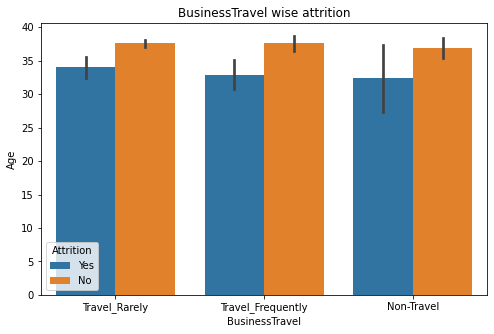

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x="BusinessTravel", y = "Age", data = hr_data,hue = "Attrition" )
plt.title("BusinessTravel wise attrition")

There is no impact of travelling on attrition

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


<AxesSubplot:ylabel='Department,Attrition'>

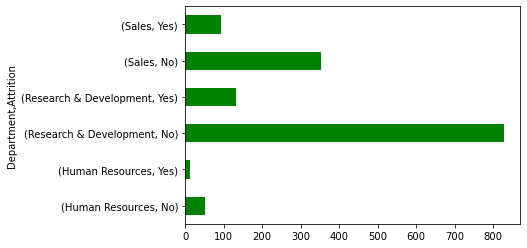

In [93]:
print(hr_data["Department"].value_counts())
hr_data.groupby(["Department","Attrition"])["Attrition"].count().plot(kind = "barh", color='green')

R&D department frequency is more in the data thus we see more number of attrition in R&D department. lets check the departmment wise stats

<AxesSubplot:xlabel='Attrition,EducationField'>

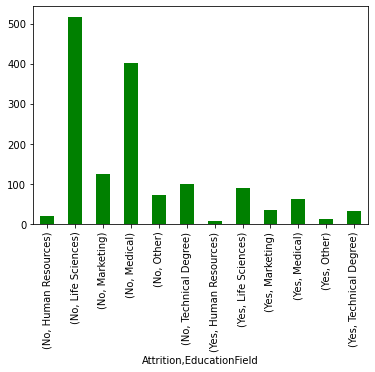

In [92]:
hr_data.groupby(["Attrition","EducationField"])["Attrition"].count().plot(kind = "bar" , color='green')


high attrition observed in life science and medical department 

In [14]:
"""since distance columns range is wide, i want to check the attrition rate distance wise so have created bins.
i have created a seprated data for analysis purpose """
distance = pd.cut(hr_data["DistanceFromHome"],bins = 5)
for_analysis = pd.concat([hr_data["Attrition"],distance], axis =1, join = "inner")

<AxesSubplot:ylabel='Attrition,DistanceFromHome'>

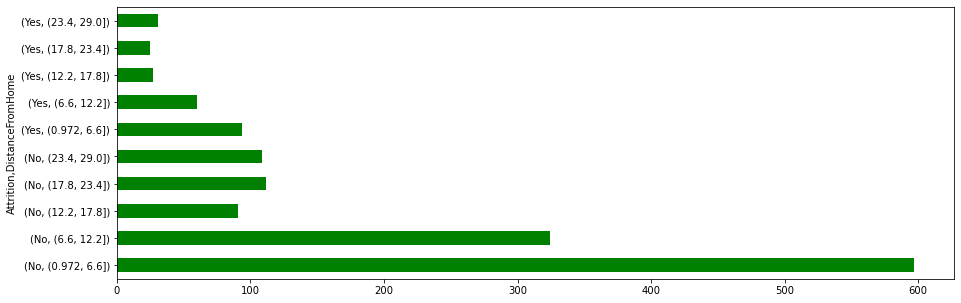

In [95]:
plt.figure(figsize=(15,5))
# creating the bar plot
for_analysis.groupby(["Attrition","DistanceFromHome"])["Attrition"].count().plot(kind = "barh", color='green')

it has been observed that people attrition who had less distance. maximum attrition observation between 1 to 12 KM.

"Education<br>\n1 'Below College'\n2 'College'\n3 'Bachelor'\n4 'Master'\n5 'Doctor'"

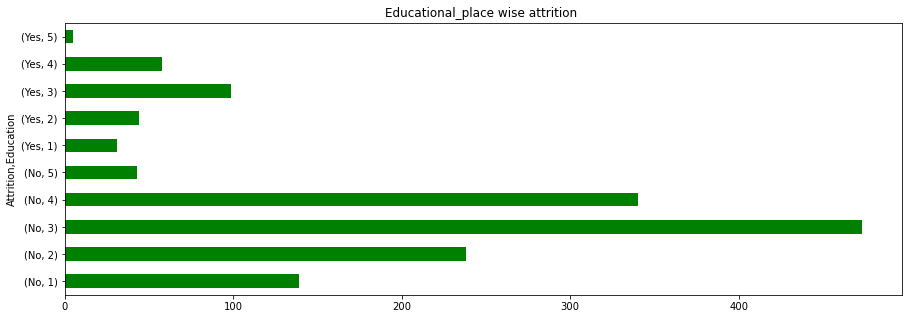

In [96]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","Education"])["Attrition"].count().plot(kind = "barh", color='green')
plt.title("Educational_place wise attrition ")
"""Education<br>
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'"""

Becholar and master have high attrition. there could be a reason that number of employee are more from these two category

"EnvironmentSatisfaction\n1 'Low'\n2 'Medium'\n3 'High'\n4 'Very High'"

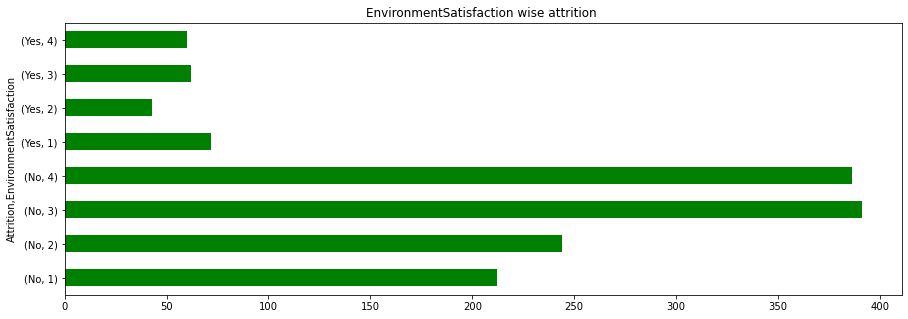

In [97]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","EnvironmentSatisfaction"])["EnvironmentSatisfaction"].count().plot(kind = "barh", color='green')
plt.title("EnvironmentSatisfaction wise attrition ");

"""EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'"""

As usual due to low satisfaction, attrition rate it high.Surprisingly we seen high attrition in 3 and 4 category also 

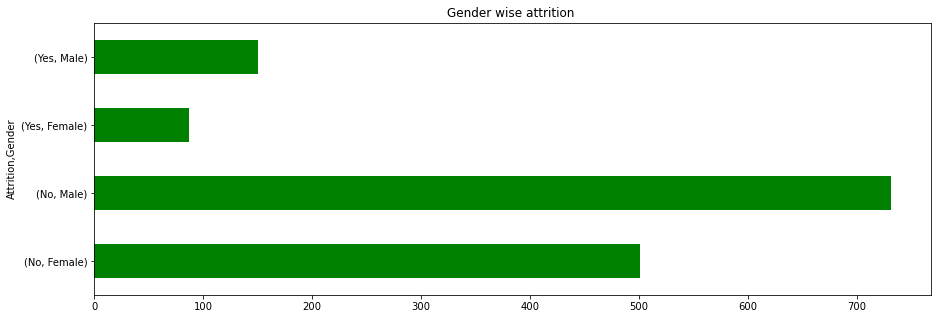

In [98]:
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","Gender"])["Gender"].count().plot(kind = "barh", color='green')
plt.title("Gender wise attrition ");

Male has high attrition rate as compared to female.

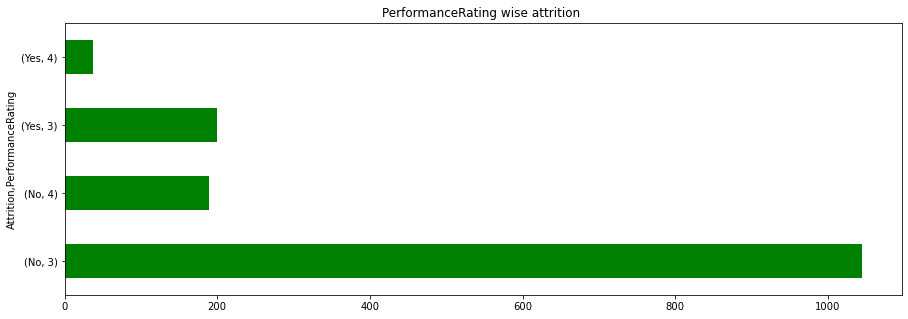

In [99]:
# PerformanceRating         
plt.figure(figsize=(15,5))
hr_data.groupby(["Attrition","PerformanceRating"])["PerformanceRating"].count().plot(kind = "barh", color='green')
plt.title("PerformanceRating wise attrition ");

1 is attrition and 0 is no attriton, 
Rating 3 has more attrition than 4 

In [20]:
# for analysis purpose
hr_data1 = hr_data.copy()

<AxesSubplot:>

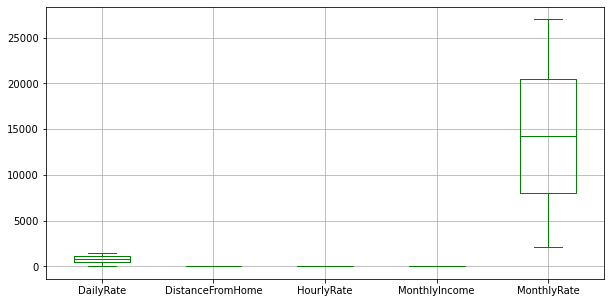

In [100]:
num_col_boxplot = hr_data1[["DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate"]]
num_col_boxplot.boxplot(figsize = (10,5), color='green')

<AxesSubplot:>

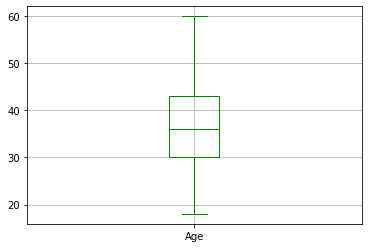

In [101]:
hr_data1.boxplot("Age", color='green')

<AxesSubplot:>

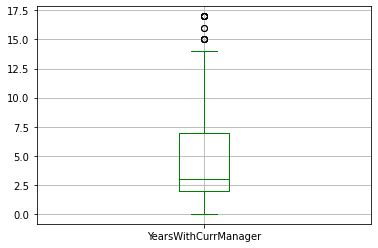

In [102]:
hr_data1.boxplot("YearsWithCurrManager", color='green')

<AxesSubplot:>

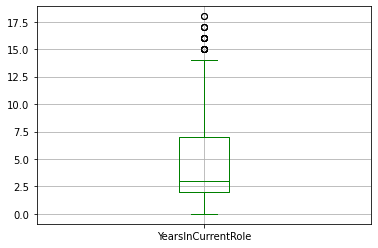

In [103]:
hr_data1.boxplot("YearsInCurrentRole", color='green')

we have observed outlier in monthly income. we are assuming income of a few people may be have high pay as per designation

DistanceHome and Monthlyincome has skewness less correct them

In [25]:
hr_data1["DistanceFromHome"] =np.cbrt(hr_data1["DistanceFromHome"])
hr_data1["MonthlyIncome"] =np.log(hr_data1["MonthlyIncome"])

In [26]:
hr_data1[["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate"]].skew()

Age                 0.413286
DailyRate          -0.003519
DistanceFromHome    0.186998
HourlyRate         -0.032311
MonthlyIncome       0.286192
MonthlyRate         0.018578
dtype: float64

# Label Encodeing

In [27]:
object_columns.sample(10)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1405,No,Non-Travel,Research & Development,Medical,Female,Research Director,Married,Y,No
1336,No,Travel_Rarely,Research & Development,Technical Degree,Male,Research Scientist,Married,Y,No
192,Yes,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1253,No,Non-Travel,Sales,Marketing,Female,Sales Executive,Single,Y,No
1343,No,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
916,No,Travel_Rarely,Sales,Marketing,Female,Manager,Married,Y,No
870,No,Travel_Rarely,Sales,Life Sciences,Male,Sales Executive,Married,Y,Yes
1365,Yes,Travel_Frequently,Sales,Technical Degree,Male,Sales Representative,Single,Y,No
1123,No,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Single,Y,Yes
588,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Married,Y,No


In [28]:
hr_data1["Attrition"] = hr_data1["Attrition"].replace({"Yes":1,"No":0}) 
hr_data1["Gender"] = hr_data1["Gender"].replace({"Female":0,"Male":1})
hr_data1["Department"] = hr_data1["Department"].replace({"Human Resources":0,"Research & Development":1,"Sales":2})
hr_data1["MaritalStatus"] = hr_data1["MaritalStatus"].replace({"Divorced":0,"Married":1,"Single":2})
hr_data1["OverTime"] = hr_data1["OverTime"].replace({"Yes":0,"No":1})
hr_data1["BusinessTravel"] = hr_data1["BusinessTravel"].replace({"Non-Travel":0,"Travel_Frequently":1,"Travel_Rarely":2})

In [29]:
edu = {'Life Sciences': 2,
         'Other': 1,
         'Medical':4 ,
         'Marketing': 3,
         'Technical Degree': 5,
         'Human Resources': 0}

jon_role = {'Sales Executive': 7,
         'Research Scientist': 5,
         'Laboratory Technician': 2,
         'Manufacturing Director': 3,
         'Healthcare Representative': 1,
         'Manager': 4,
         'Sales Representative': 8,
         'Research Director': 6,
         'Human Resources': 0}


In [30]:
hr_data1["EducationField"] = hr_data1["EducationField"].replace(edu)
hr_data1["JobRole"] = hr_data1["JobRole"].replace(jon_role)

Categorical columns have been label encoded, i have used pandas replace function

In [31]:
hr_data1.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
893,29,0,2,1010,1,1.000000,3,2,1,1249,...,1,80,3,3,5,3,3,2,1,2
358,36,0,0,845,2,1.000000,5,4,1,479,...,2,80,0,7,6,3,1,0,0,0
376,51,0,2,1178,2,2.410142,2,2,1,500,...,3,80,1,18,2,2,7,7,0,7
1181,49,0,2,465,1,1.817121,1,2,1,1661,...,2,80,1,30,3,3,15,11,2,12
275,37,0,0,728,1,1.000000,4,4,1,380,...,1,80,2,15,2,3,5,2,0,2


In [32]:
# Over18 and EmployeeCount have only one value thus it will not provide any information about the data.considering EmployeeNumber is emp ID thus deleting it.
hr_data1.drop(columns =["Over18","EmployeeCount","EmployeeNumber","StandardHours"],axis =1, inplace = True)

Text(0.5, 1.0, 'Correlation Plot')

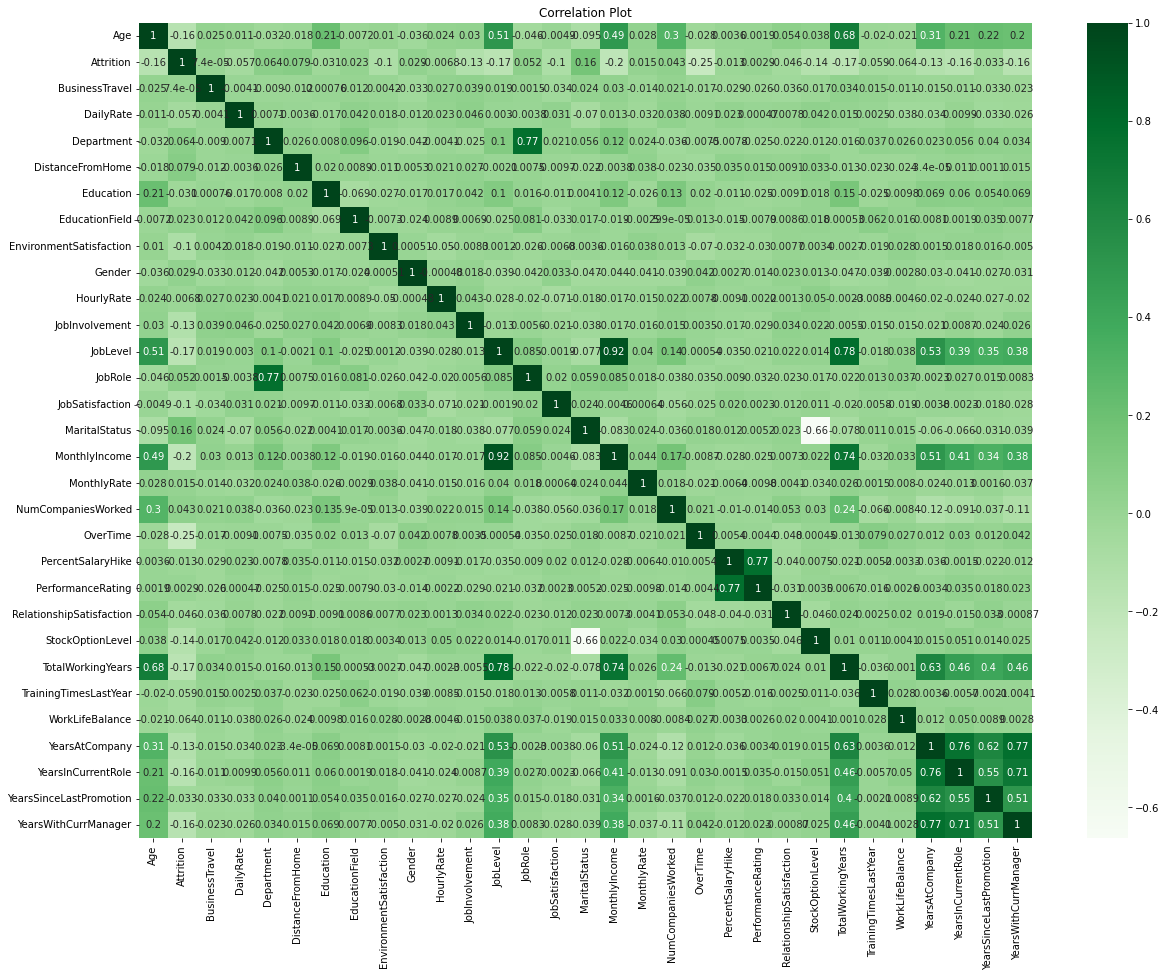

In [33]:
# let check the relationship of the features
plt.figure(figsize =(20,15))
sns.heatmap(hr_data1.corr(),annot= True,cmap = 'Greens')
plt.title("Correlation Plot")

Job role is correlated with departent , job level is positively correlated with monthlyincome and totalworkingyear, total working year is correlated with Age, job level,monhtly income.
year of complany correlated with year at current role and yearwith current manager
so we will remove Job role,job level and year at company

In [34]:
hr_data1.drop(columns =["YearsAtCompany","JobLevel","JobRole", "TotalWorkingYears","TotalWorkingYears","PercentSalaryHike"],axis =1,inplace = True)

<AxesSubplot:>

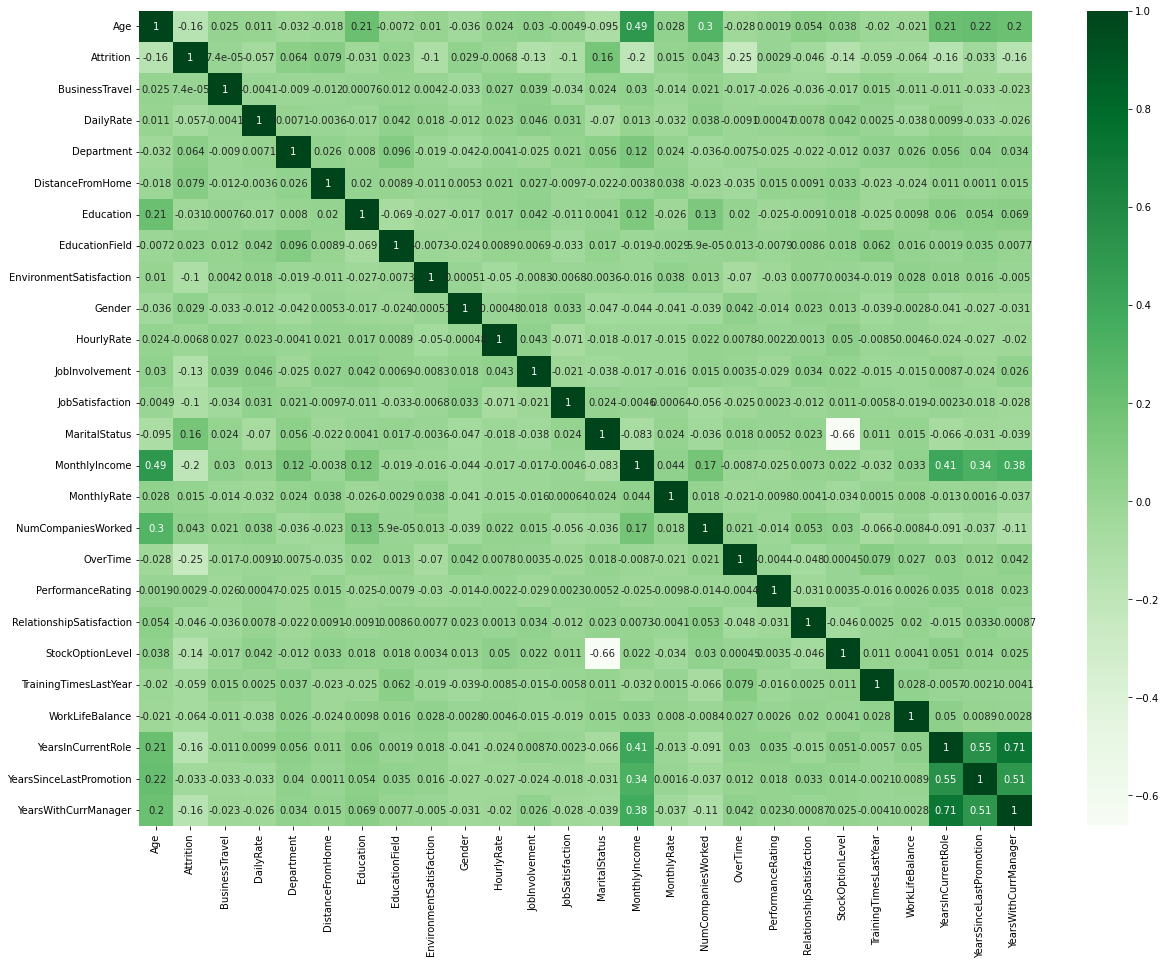

In [43]:
plt.figure(figsize =(20,15))
sns.heatmap(hr_data1.corr(),annot= True, cmap = 'Greens')

# Handling imbalance data by oversampling

In [36]:
# Seprating data into X and y
X = hr_data1.drop("Attrition",axis =1)
y = hr_data1["Attrition"]

In [37]:
# implementing oversampling for handling imbalance data
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state = 40)
res_X,res_y = smote.fit_resample(X , y)

by oversampling we have overcome the imbalance issue.

# Modeling

In [38]:
for i in range(50,500,75):
    RF = RandomForestClassifier()
    X_train,X_test,y_train,y_test = train_test_split(res_X,res_y,test_size = 0.2, random_state=i)
    RF.fit(X_train,y_train)
    print("training score: ",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("Test score: ",RF.score(X_test,y_test),"Random_state",i)
    print("Accuracy :",accuracy_score(pred,y_test))
    print("Roc_auc_score :",roc_auc_score(pred,y_test))
    print("confuion_matrix", "\n",confusion_matrix(pred,y_test))
    print("classification_report", "\n",classification_report(pred,y_test))

training score:  1.0 Random_state 50
Test score:  0.9047619047619048 Random_state 50
Accuracy : 0.9047619047619048
Roc_auc_score : 0.9045452674049982
confuion_matrix 
 [[192  22]
 [ 20 207]]
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       214
           1       0.90      0.91      0.91       227

    accuracy                           0.90       441
   macro avg       0.90      0.90      0.90       441
weighted avg       0.90      0.90      0.90       441

training score:  1.0 Random_state 125
Test score:  0.9229024943310657 Random_state 125
Accuracy : 0.9229024943310657
Roc_auc_score : 0.9237378940861322
confuion_matrix 
 [[208  22]
 [ 12 199]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       230
           1       0.90      0.94      0.92       211

    accuracy                           0.92       441
   macro avg       0.92

In [39]:
models = [LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier()]
for model in models:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(res_X,res_y,test_size = 0.2, random_state=275)
    model.fit(X_train1,y_train1)
    print("training score: ",model.score(X_train1,y_train1),"Model",model)
    pred = model.predict(X_test1)
    print("Test score: ",RF.score(X_test1,y_test1))
    print("Accuracy :",accuracy_score(pred,y_test1))
    print("Roc_auc_score :",roc_auc_score(pred,y_test1))
    print("confuion_matrix", "\n",confusion_matrix(pred,y_test1))
    print("classification_report", "\n",classification_report(pred,y_test1))

training score:  0.7546848381601363 Model LogisticRegression()
Test score:  0.9886621315192744
Accuracy : 0.7505668934240363
Roc_auc_score : 0.7502785572796302
confuion_matrix 
 [[176  57]
 [ 53 155]]
classification_report 
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       233
           1       0.73      0.75      0.74       208

    accuracy                           0.75       441
   macro avg       0.75      0.75      0.75       441
weighted avg       0.75      0.75      0.75       441

training score:  1.0 Model RandomForestClassifier()
Test score:  0.9886621315192744
Accuracy : 0.9160997732426304
Roc_auc_score : 0.9188025297495215
confuion_matrix 
 [[218  26]
 [ 11 186]]
classification_report 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       244
           1       0.88      0.94      0.91       197

    accuracy                           0.92       441
   macro avg    

We have run for loop on randomforest to find the best random_state and we have found that 275 works well, with that random state we have trained multiple model and found that RandonForestClassifier gives best f1 score for both the class and taking it as final model

# GridSearchCV

In [40]:
para = {"n_estimators":[100,200,300,400],
       "max_depth":[2,3,4],
       "max_features":["auto", "sqrt", "log2"]}
grid_RF = RandomForestClassifier()
grid_RF = GridSearchCV(grid_RF,para,scoring = "f1",cv =10,n_jobs = -1, verbose =2)
grid_RF.fit(X_train1,y_train1)
print(grid_RF.best_score_)
print(grid_RF.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
0.8740285815747877
{'max_depth': 4, 'max_features': 'log2', 'n_estimators': 400}


# cross validation

In [41]:
grid_RF = RandomForestClassifier(max_depth= 4, max_features ='log2', n_estimators =400)
for i in range(2,10):
    cross_score = cross_val_score(grid_RF,res_X,res_y,scoring = "f1",cv =i)
    print("CV",i,"mean",cross_score.mean(),"std",cross_score.std())

CV 2 mean 0.8611939467186048 std 0.032650834726533406
CV 3 mean 0.8632045415526269 std 0.06602188836091959
CV 4 mean 0.8612949514672965 std 0.08515092464276597
CV 5 mean 0.8554049988394018 std 0.1082293232051272
CV 6 mean 0.859142349720762 std 0.0964358183004689
CV 7 mean 0.8624459514460211 std 0.0872554803486696
CV 8 mean 0.8633559780006154 std 0.09017903546397013
CV 9 mean 0.8636270475165992 std 0.08955823314564433


Cross_validation with CV 7 is CV 

# Model Saving

In [42]:
import pickle
grid_RF.fit(res_X,res_y)
filename = "HR_Attrition_Analytic.pkl"
with open(filename,"wb") as f:
    pickle.dump(grid_RF,f)

# **Conclusion:**<br>
Dataset was quite clear, there was no missing value. It was mix of categorical and nuerical data. We have performed multiple analysis to check that which factor play important role in attrition. we checked outlier and found that few columns have some extreme value but it is very close to upper whisker so i didnt trea by considering the ensamble methods will deal with them.I have checked correlated of each features and found that couple of features were correlated so have deleted them.<br>
As we saw at the initial phase of analysis that data was imbalance, we have corrected that by appying oversampling technique and then Model was trained.<br>Randomforest has given best F1 score and have taken it for final model.